In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --

v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



Q0. Write a function that takes a vector and replaced it with the mean of the that vector
  * Let's call that function `replace_na_mean`

  * Try your function using the following snippet:

```
replace_na_mean(c(1, NA, 2, 3, 2, 2, NA))
```

In [63]:
# x = c(1,2,3)
# x[c(TRUE, TRUE, FALSE)] 
# x[c(TRUE, TRUE, FALSE)] = 7 will replace 1 and 2 with 7
x = c(1, NA, 2, 3, 2, 2, NA)
x[c(FALSE, TRUE, FALSE, FALSE, FALSE, FALSE, TRUE)] = 17
print(x)

[1]  1 17  2  3  2  2 17


In [74]:
x_1 = c(1, NA, 2, 3, 2, 2, NA)
mean(x_1, na.rm = TRUE)

[1] 2

In [75]:
replace_na_mean = function(x){
    x[is.na(x)] = mean(x, na.rm = TRUE) # statement
    x ## expression which will return the value so don't have to print
}
replace_na_mean(c(1, NA, 2, 3, 2, 2, NA))

[1] 1 2 2 3 2 2 2

Q1. Write a function that returns the sample space for the experiment consisting of samplign a 4 digit PIN
  * Call your function get_all_perms

  * Essentially, your function does not take any arguments but returns the sample space consisting of all the four digit numbers
   
  * The function `expand.grid` expand.grid creates a data frame from all combinations of the supplied vectors or factors. For example:
 
  ```expand.grid(0:1, 0:1, 0:1)```

* generates  

![](https://www.dropbox.com/s/cnlt4fg8rxd01d6/expand.grid.png?dl=1)
 

* Strategy, use `expand.grid` to generate the permutation for four verctation in the range 0:9
  * Return the number of rows in that `data.frame`

  

In [88]:
get_all_perms <- function(x){
    expand.grid(0:9, 0:9, 0:9, 0:9) %>%
    nrow()
}
get_all_perms()

[1] 10000

Q2. The function above is not very useful since it always computes the same thing, namely the number of possible permutation of digits. One way to make it more useful is by passing as an argument the number of digits to consider, i.e., the number of columns in `expand.grid`. Let;s call that param `size`, which by default should be `4`. For exmaple:

*  `get_all_perms(size = 1 )` will return all the number of size 1 (0-9)
*  `get_all_perms(size = 3 )` will return all the permutations of size 3 (000 - to 999)


* Hint: `expand.grid` requires the number of input parameters to match the permutation length. We need to automate that so that the number of vectors passed as input matches the `size` values passed into `get_all_perms`
  * We can do that using `replicate`
  * `replicate(2, c(1,2,3), simplify=FALSE)` will repeat the vector `c(1,2,3)` twice
    * We need to pass `replicate` the value `simplify=FALSE` so that it does not convert the output for us into a matrix
  * Use pipe (`%>%`) pass the output of `replicate` into expand.grid
  * Make sure replicated generate the correct input for exand.grid
  

In [90]:
get_all_perms <- function(size){
    replicate(size, 0:9, simplify = FALSE) %>%
    expand.grid()
}
get_all_perms(size = 4)
get_all_perms(size = 3)

Var1,Var2,Var3,Var4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


Var1,Var2,Var3
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


Q3.

* Given a fish disease that occurs with a probability of p= 0.43
* You sampled 340 animals
* How many of these animals should you expect to see the disease in?
* Hint: you will need to compute the probability of each element of the sample space and find the value that has the highest probability

In [52]:
### Write your code here
fish_disease = dbinom(1:340, size=340, prob=0.43)
which.max(fish_disease)

[1] 146

Q4. Plot the two following distributions:

$$
x \sim \mathcal{N}(10, 0.5) \\
y \sim \mathcal{N}(10.2, 0.5) \\
$$

* Your plot should look like the following
![](https://www.dropbox.com/s/psrjtl6abjla7z5/sample_gaussian_plot.png?dl=1)


* Draw 40 values from the first distribution and store them in a variable called `x_sample`
* Draw 40 values from the second distribution and store them in a variable called `y_sample`
  * make sure you run the following line before you sample data
  ```set.seed(42)```
 
* Do a `t-`test to compute the `x_sample` and `y_sample`
  * A `t-`test compares two vectors of values and predicts if the two vectors are from the same distribution
  * The format for the t-test in R is
 
 `t.test(x,y)` where `x` an `y` are the vectors of values we would like to compare.
  * Look at the `p-value`, if it's smaller than say 0.05, then there is a statistically significant difference between the two datasets.

* Do you agree with the conclusion of the `t-test`. In other words, would you be comfortable reporting in a publication that the data in `x_sample` and `y_sample` are statistically different?

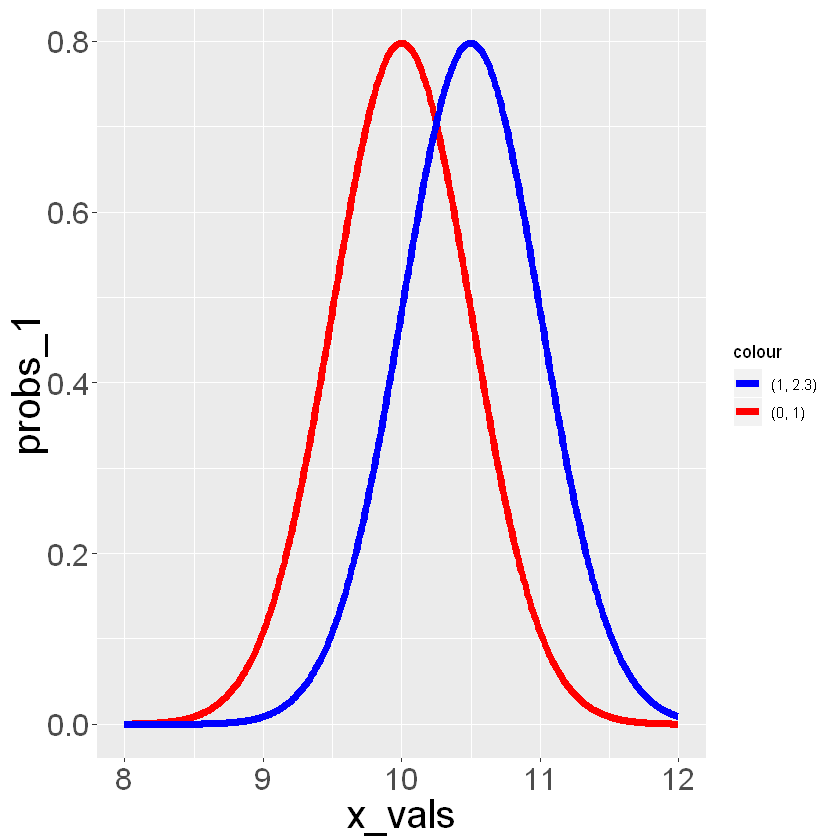

In [37]:
x_vals = seq(8, 12, 0.01)
probs_1 = mapply(dnorm, x_vals, mean = 10, sd = 0.5)
probs_2 = mapply(dnorm, x_vals, mean = 10.5, sd = 0.5)

ggplot() +
    geom_line(aes(x = x_vals, y = probs_1, color = "red"), size = 2) +
    geom_line(aes(x = x_vals, y = probs_2, color = "blue"), size = 2) +
    xlim(8,12) +
    theme(axis.title.x = element_text(size = 24), axis.title.y = element_text(size = 24)) +
    theme(axis.text.x = element_text(size = 18), axis.text.y = element_text(size = 18)) +
    scale_color_manual(labels = c("(1, 2.3)", "(0, 1)"), values = c("blue", "red"))

In [30]:
set.seed(42)
x_sample = rnorm(40, mean = 10, sd = 0.5)
y_sample = rnorm(40, mean = 10.2, sd = 0.5)

In [31]:
t.test(x_sample, y_sample)
# do you agree with conclusion of t-test that x_sample and y_sample are 
# statistically different based on p-value<0.05?
# doesn't take into account "effect size" - better to measure effect size


	Welch Two Sample t-test

data:  x_sample and y_sample
t = -2.1504, df = 72.3, p-value = 0.03486
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.50040708 -0.01897381
sample estimates:
mean of x mean of y 
 9.980232 10.239922 


Q5. Challenge

* We have used the function `dnorm` to plot the bell-shaped curve for a distribution $ x \sim \mathcal{N}(10, 0.5)$
  * Use seq(8, 12, 0.1) to generate the x-axis values
  * The pdf should look like the following

![](https://www.dropbox.com/s/jl2c2atpkxze7ev/sample_pdf_sum_question.png?dl=1)

* Use `dnorm` to compute the probability density for each point along the $x-$axis generated using `seq()` above
  * What do you notice?
  * How do you fix that?
  


In [8]:
x_vals = seq(8, 12, 0.1)
prob_den =dnorm(x_vals, mean = 10, sd = 0.5)
prob_den

[1] 0.0002676605 0.0005838939 0.0012238039 0.0024644383 0.0047681764
 [6] 0.0088636968 0.0158309032 0.0271659385 0.0447890606 0.0709491857
[11] 0.1079819330 0.1579003166 0.2218416694 0.2994549313 0.3883721100
[16] 0.4839414490 0.5793831055 0.6664492058 0.7365402806 0.7820853880
[21] 0.7978845608 0.7820853880 0.7365402806 0.6664492058 0.5793831055
[26] 0.4839414490 0.3883721100 0.2994549313 0.2218416694 0.1579003166
[31] 0.1079819330 0.0709491857 0.0447890606 0.0271659385 0.0158309032
[36] 0.0088636968 0.0047681764 0.0024644383 0.0012238039 0.0005838939
[41] 0.0002676605

In [13]:
sum(prob_den)
## sum(prob_den) - should give prob=1 BUT giving 9.999
# compute area around distributrion values (A = W x H) so every .1 I'm generating a value, space between each value is 0.1
# Width = 0.1, take vector multiply by small chunk space 0.1

[1] 9.999599

In [14]:
sum(prob_den*0.1)

[1] 0.9999599